In [1]:
import nltk

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df = pd.read_csv('sentimentdataset.csv')
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
183,184,186,"Anxiety grips my chest, a relentless grip on ...",Anxiety,2018-09-05 09:30:00,RestlessMind,Facebook,#Anxiety #Restlessness,10.0,20.0,UK,2018,9,5,9
535,536,540,"At the Oscars, the actor graciously accepts an...",Gratitude,2016-02-28 20:30:00,AwardWinningActorOscarsRecipient,Facebook,#Gratitude #OscarWinningMoment,18.0,35.0,USA,2016,2,28,20
286,287,291,"Bathed in the golden hues of gratefulness, a ...",Grateful,2022-04-01 18:30:00,SunsetAdmirer,Instagram,#Grateful #GoldenHues,19.0,38.0,Australia,2022,4,1,18
484,485,489,"Lost in the maze of curiosity, each twist and ...",Curiosity,2018-09-22 12:45:00,MazeDiscovery,Instagram,#Curiosity #TreasuresOfDiscovery,22.0,45.0,India,2018,9,22,12
221,222,224,Flipping through the pages of an old yearbook...,Nostalgia,2017-06-18 14:45:00,YearbookExplorer,Instagram,#Nostalgia #YearbookMemories,12.0,25.0,India,2017,6,18,14


In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    732 non-null    int64  
 1   Unnamed: 0.1  732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    732 non-null    int64         
 1   Unnamed: 0.1  732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    float64       
 9   Likes         732 non-null    float64       
 10  Country       732 non-null    object        
 11  Year          732 non-null    int64         
 12  Month         732 non-null    int64         
 13  Day           732 non-null    int64         
 14  Hour          732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(

In [10]:
object_columns = df.select_dtypes(include=['object']).columns 

In [11]:
for i in object_columns:
    df[i] = df[i].str.strip()

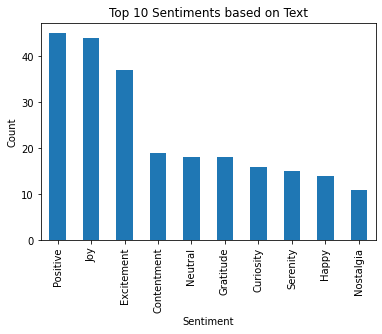

In [13]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

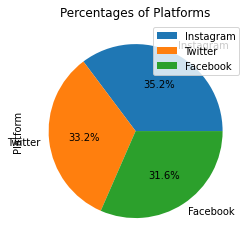

In [14]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

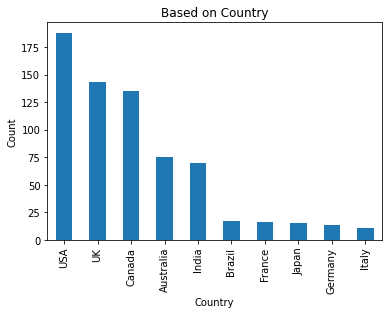

In [15]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

## Text Preprocessing 😊

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
def process_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

In [19]:
df['processed_text'] = df['Text'].apply(process_text)
print(df[['Text', 'processed_text']].head())

                                          Text                  processed_text
0        Enjoying a beautiful day at the park!         enjoy beauti day park !
1           Traffic was terrible this morning.          traffic terribl morn .
2          Just finished an amazing workout! 💪         finish amaz workout ! 💪
3  Excited about the upcoming weekend getaway!   excit upcom weekend getaway !
4  Trying out a new recipe for dinner tonight.  tri new recip dinner tonight .


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [21]:
vectorizer = CountVectorizer(binary=True)
dtm_boolean = vectorizer.fit_transform(df['processed_text'])
dtm_boolean_df = pd.DataFrame(dtm_boolean.toarray(), columns=vectorizer.get_feature_names_out())

In [22]:
dtm_boolean_df.head()

,ablaz,abstract,abyss,academ,accept,accident,accomplish,ach,achiev,acoust,...,writinggroup,wrong,year,yearbook,yearn,york,young,zen,zero,zest
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [24]:
tfidf_df.head()

,ablaz,abstract,abyss,academ,accept,accident,accomplish,ach,achiev,acoust,...,writinggroup,wrong,year,yearbook,yearn,york,young,zen,zero,zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['Sentiment'], test_size=0.35, random_state=42)

In [38]:
text_classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', SVC(kernel='linear'))  # You can use a different classifier if needed
])

In [39]:
text_classifier_pipeline.fit(X_train, y_train)

predictions = text_classifier_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.32
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         4
          Admiration       0.00      0.00      0.00         3
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         2
           Amusement       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         2
        Apprehensive       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         4
                 Awe       1.00      0.67      0.80         3
                 Bad       0.00      0.00      0.00         3
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         3
         Bittersweet       0.0

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

In [40]:
text_classifier_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust parameters
])

In [43]:
text_classifier_pipeline_rf.fit(X_train, y_train)

predictions = text_classifier_pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.44
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         4
      Accomplishment       0.00      0.00      0.00         0
          Admiration       0.00      0.00      0.00         3
           Adoration       0.00      0.00      0.00         0
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         2
           Amusement       0.33      1.00      0.50         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         2
        Apprehensive       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         4
       ArtisticBurst       0.00      0.00      0.00         0
                 Awe       0.50      0.67      0.57         3
                 Bad       0.00      0.00      0.00         3
            Betrayal       0.5

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

# Using TF-IDF Vectorizer
logistic_regression_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', LogisticRegression())
])
logistic_regression_tfidf.fit(X_train, y_train)

predictions_lr_tfidf = logistic_regression_tfidf.predict(X_test)

accuracy_lr_tfidf = accuracy_score(y_test, predictions_lr_tfidf)
classification_report_lr_tfidf = classification_report(y_test, predictions_lr_tfidf, zero_division=0)

print("Logistic Regression with TF-IDF Accuracy:", accuracy_lr_tfidf)
print("Classification Report:\n", classification_report_lr_tfidf)


Logistic Regression with TF-IDF Accuracy: 0.19844357976653695
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.00      0.00      0.00         4
          Admiration       0.00      0.00      0.00         3
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         2
           Amusement       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         2
        Apprehensive       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         4
                 Awe       1.00      0.33      0.50         3
                 Bad       0.00      0.00      0.00         3
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00    

# Support Vector Machines (SVM)


In [45]:
from sklearn.svm import SVC

# Using TF-IDF Vectorizer
svm_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', SVC(kernel='linear'))  
])
svm_tfidf.fit(X_train, y_train)

predictions_svm_tfidf = svm_tfidf.predict(X_test)

accuracy_svm_tfidf = accuracy_score(y_test, predictions_svm_tfidf)
classification_report_svm_tfidf = classification_report(y_test, predictions_svm_tfidf, zero_division=0)

print("SVM with TF-IDF Accuracy:", accuracy_svm_tfidf)
print("Classification Report:\n", classification_report_svm_tfidf)


SVM with TF-IDF Accuracy: 0.3229571984435798
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       1.00      1.00      1.00         4
          Admiration       0.00      0.00      0.00         3
           Affection       0.00      0.00      0.00         1
         Ambivalence       1.00      1.00      1.00         2
           Amusement       1.00      1.00      1.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         2
        Apprehensive       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         4
                 Awe       1.00      0.67      0.80         3
                 Bad       0.00      0.00      0.00         3
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00         3


# Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

# Using TF-IDF Vectorizer
naive_bayes_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', MultinomialNB())
])
naive_bayes_tfidf.fit(X_train, y_train)

predictions_nb_tfidf = naive_bayes_tfidf.predict(X_test)

accuracy_nb_tfidf = accuracy_score(y_test, predictions_nb_tfidf)
classification_report_nb_tfidf = classification_report(y_test, predictions_nb_tfidf , zero_division=0)

print("Naive Bayes with TF-IDF Accuracy:", accuracy_nb_tfidf)
print("Classification Report:\n", classification_report_nb_tfidf)



Naive Bayes with TF-IDF Accuracy: 0.1517509727626459
Classification Report:
                       precision    recall  f1-score   support

          Acceptance       0.00      0.00      0.00         4
          Admiration       0.00      0.00      0.00         3
           Affection       0.00      0.00      0.00         1
         Ambivalence       0.00      0.00      0.00         2
           Amusement       0.00      0.00      0.00         1
               Anger       0.00      0.00      0.00         1
        Anticipation       0.00      0.00      0.00         2
        Apprehensive       0.00      0.00      0.00         1
             Arousal       0.00      0.00      0.00         4
                 Awe       0.00      0.00      0.00         3
                 Bad       0.00      0.00      0.00         3
            Betrayal       0.00      0.00      0.00         3
              Bitter       0.00      0.00      0.00         1
          Bitterness       0.00      0.00      0.00   